# Big-O Notation 

Evaluation metrics are inherently critical to the semiconductor field. From electrical testing of logic devices, to throughput of nanofabrication equipment, to even Moore's Law, we're only as good as our chips. And all this is fine, because hardware has hard metrics with little room for ambiguity. But this drive toward smaller, faster, cheaper is all for naught if the algorithms being run on our devices aren't held to an equally stringent standard. An inefficient algorithm run on an efficient CPU is still an inefficient process. But how does one hold a high standard to a non-standardized process? 
**Enter Big-O**. 

While assessing logic/memory devices may be intuitive (except for some of the physics :) ), algorithm analysis is less about the hard numbers. Clockspeed between like-CPU's yield similar times, so algorithms must be the same right? Nope. Hardware differs machine to machine, so 50ns on your machine *does not* equal 50ns, even if we're running the same algorithm.

**Big-O Notation** is a way to *relatively* compare the complexity of a given algorithm. Instead of evaluating an algorithm like you would a CPU, **Big-O evaluates how a runtime grows as a function of the input.**

Here are the list of the sorted complexities, with least complex first. <br><br>

|Big-O|Name|
|---|---|
|1|Constant|
|log(n)|Logarithmic|
|n|Linear|
|nlog(n)|Log Linear|
|n^2|Quadratic|
|n^3|Cubic|
|2^n|Exponential|

Evaluating the Big-O of an algorithm is, in effect, like evaluating mathematical limits. Consider the following simple limit problem:

$ \large \lim_{x\to\infty} \frac{2x}{x^2} $ 

In evaluating the limit, look at both of the $x$ terms. We have $2x$ in the numerator which, as x appraoches infinity, will scale *linearly*. Whereas in the denominator, $e^x$ will scale as a *quadratic*. As these two $x$ terms compete for complexity, the exponential term will obviously win as $x$ moves to inifinity, thus in evaluating the limit, the weaker $x$ term can be dropped completely from evaluation. So in effect...

$ \large \lim_{x\to\infty} \frac{2x}{x^2} = \large \lim_{x\to\infty} \frac{1}{x^2} = 0 $ 

In Big-O analysis, algorithms are evaluated in much the same way: the algorithm's complexity is evaluated as the most complex operation within the algorithm. Below is an analogous function to the above limit.

$ \large O(n) + O(n^2) = O(n^2) $

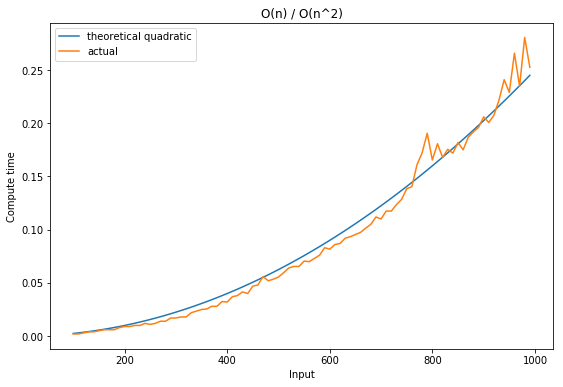

In [4]:
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def func(n):
    lst = []
    for i in range(n):
        for j in range(n):
            lst.append(2*n)

n_list = np.arange(100, 1000, 10)
comp_times = []

for i in n_list:
    tic = time.time()
    func(i)
    toc = time.time()
    clock = toc - tic
    comp_times.append(clock)
    
plt.figure(figsize=(9, 6))
plt.plot(n_list, (n_list/2e3)**2, label='theoretical quadratic')
plt.plot(n_list, comp_times, label='actual')
plt.ylabel('Compute time')
plt.xlabel('Input')
plt.legend()
plt.title('O(n) / O(n^2)');

You can see from the chart that despite the linear complexity of the appending `2*n` to a list eventually becomes dominated by the nested for loop. Or in Big-O notation:

$ \large O(n) + O(n^2) \Rightarrow O(n^2) $

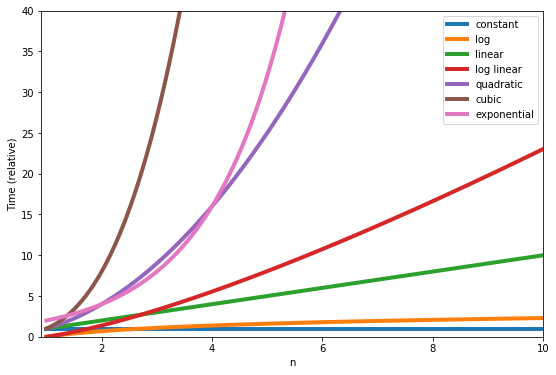

In [6]:
n = np.linspace(1, 10, 1000)
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n]
labels = ['constant', 'log', 'linear', 'log linear', 'quadratic', 'cubic', 'exponential']

fig, ax = plt.subplots(figsize=(9, 6))

for o, label in zip(big_o, labels):
    ax.plot(n, o, label=label, lw=4);

ax.set_ylim(0, 40)
ax.set_xlim(0.9, 10)
ax.set_ylabel('Time (relative)')
ax.set_xlabel('n')
ax.legend(prop={'size':'10'});

As you can see, some complexities can quickly get out of hand. Big-O can help spot a crashed Macbook before it happens. Let's go over the different complexities, and analyze examples.

## Constant O(1)
Here, we pass a list to `constant_complexity` and return the last value of the list. Algorithms that evaluate to O(1) don't depend on the size of the input to run.

In [7]:
def constant_complexity(n_values):
    value = n_values[-1]

lst_1 = [1, 2, 3]
lst_2 = list(range(100))

%timeit -n 1000 constant_complexity(lst_1)
%timeit -n 1000 constant_complexity(lst_2)

201 ns ± 9.44 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
186 ns ± 29.1 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Inputs of length 3 and 1000 have roughly the same clock speed on my machine. As you can see, the computation is not relative to the size of the input, thus the **Big-O of this algorithm is constant**. 

## Logarithmic O(logn) 
A **binary search** is a well known algorithm whose complexity can be evaluated to O(logn) in the worst case (see Algorithm_Design.ipynb for more on the algorithm). 

In [8]:
def log_complexity(n):
    "Search for random number in a list of n elements"
    np.random.seed(1234)
    needle = np.random.randint(n)
    haystack = np.arange(n)
    found = False
    
    while not found:
        middle = len(haystack)//2
        if needle == haystack[middle]:
            found = middle
            return haystack[found]
        elif needle < haystack[middle]:
            haystack = haystack[:middle]
        elif needle > haystack[middle]:
            haystack = haystack[middle+1:]
    return found

%timeit -n 1000 log_complexity(100)
%timeit -n 1000 log_complexity(500)
%timeit -n 1000 log_complexity(1000)
%timeit -n 1000 log_complexity(10000)

10.1 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.1 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.7 µs ± 596 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.3 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Linear O(n)
In algorithms that evaluate to O(n), the complexity scales linearly with input. You can see that the clock speeds roughly reflect a linear relationship.

In [9]:
def linear_complexity(n):
    vals = []
    for i in range(n):
        vals.append(i)
    return vals

%timeit -n 1000 linear_complexity(100)
%timeit -n 1000 linear_complexity(500)
%timeit -n 1000 linear_complexity(1000)

6.79 µs ± 641 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
29.6 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
61.7 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Log Linear (n logn) 
Many real-world algorithms evaluate to log linear complexity, such as the merge sort. In this sorting algorithm, a sequence is recursively halved and merge sorted. 

In [15]:
def loglinear_complexity(vals):
    if len(vals) > 1:
        middle = len(vals) // 2
        left = vals[:middle]
        right = vals[middle:]
        
        loglinear_complexity(left)
        loglinear_complexity(right)
    
        i = j = k = 0
    
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                vals[k] = left[i]
                i += 1
            else:
                vals[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            vals[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            vals[k] = right[j]
            j += 1
            k += 1
    
    return vals

lst1 = [1, 5, 10, 12, 15]
lst2 = [10, 23, 22, 15, 80, 50, 20, 99, 200, 105]
%timeit -n 100 loglinear_complexity(lst1)
%timeit -n 100 loglinear_complexity(lst2)

6.18 µs ± 968 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.1 µs ± 6.32 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Quadratic O(n^2)
Nested `for` loops are a well known cause for quadratic complexity, and their use can be quite expensive on compute resources.

In [39]:
def quadratic_complexity(n_values):
    lst = []
    for i in range(n_values):
        for j in range(n_values):
            lst.append(i)

%timeit -n 100 quadratic_complexity(10)
%timeit -n 100 quadratic_complexity(100)

10.3 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
561 µs ± 43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Cubic O(n^3)
If your algorithm is evaluating to a cubic complexity, it would be wise to take another look at your code. This kind of complexity can occur in modeling three-dimensional problems, where recursion is occuring happening in three levels. Vectorization is a way to elmininate these kindsn of inefficiencies.

In [1]:
def cubic_complexity(n):
    vals = []
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                vals.append(k)
                
%timeit -n 100 cubic_complexity(10)
%timeit -n 100 cubic_complexity(20)

104 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
591 µs ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exponential O(2^n)
Finally, a famous example of exponential complexity is recursively generating a Fibonacci sequence. Again, if your algorithm is evaluating to exponential complexity, you might need to rewrite.

In [3]:
def exponential_complexity(n):
    if n <= 1:
        return n
    return (exponential_complexity(n - 2) + exponential_complexity(n - 1))

%timeit -n 10 exponential_complexity(10)
%timeit -n 10 exponential_complexity(20)

22.4 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.74 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
